## CH07 Regression 機器學習實作
1.逥歸 :預測一個值（預測一個結果的機率）
2.適用場合: 預估價格，分析廣告投放效益
3.基本概念
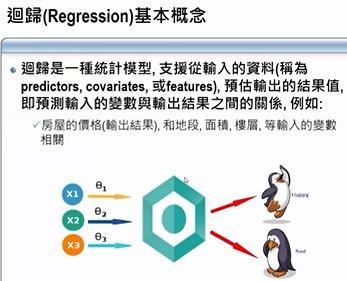
4.適用場合:
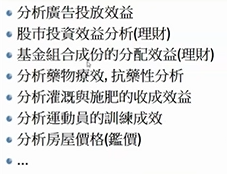
5.Linear Regression 演算法
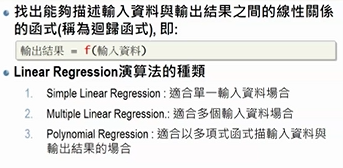
6.Simple Linear Regression
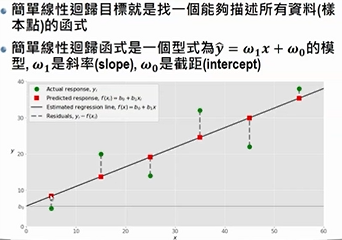
7.Multiple Linear Regression
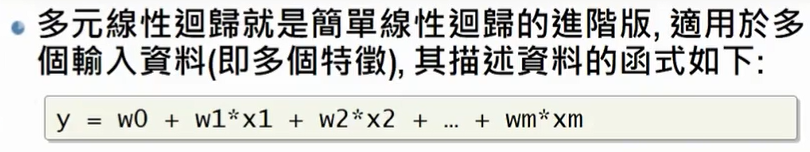
8.Polynomial Regression
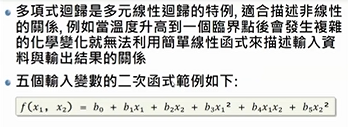
9優點和缺點
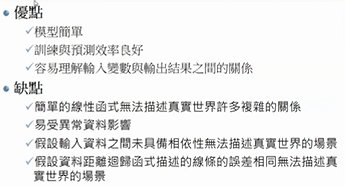

In [10]:
import pandas as pd
df = pd.read_excel(r'Datasets\Employee.xls')
display(df)

# df["獎金"]= df["業績"]*0.05
# display(df)
df.insert(4,"獎金", df["業績"]*0.05)
display(df)

,姓名,性別,職務,業績,薪資,年齡
0,John,male,Manager,1000,35000,35
1,Mary,Female,Scale,500,40000,40
2,Jack,intersex,Sales Manager,430,50000,42


,姓名,性別,職務,業績,獎金,薪資,年齡
0,John,male,Manager,1000,50.0,35000,35
1,Mary,Female,Scale,500,25.0,40000,40
2,Jack,intersex,Sales Manager,430,21.5,50000,42


### 實作: 使用 Line Regression 演算法分析廣告投放效應:
pip install statsmodels (統計模型)
熱力圖: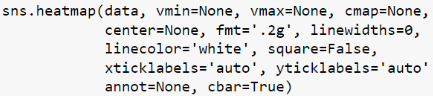
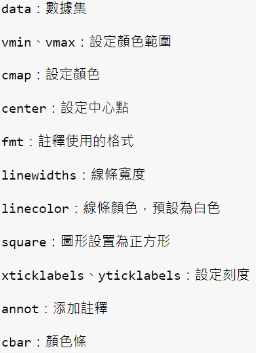

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


====df.info()================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
====df.sales.describe()================================================
count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64


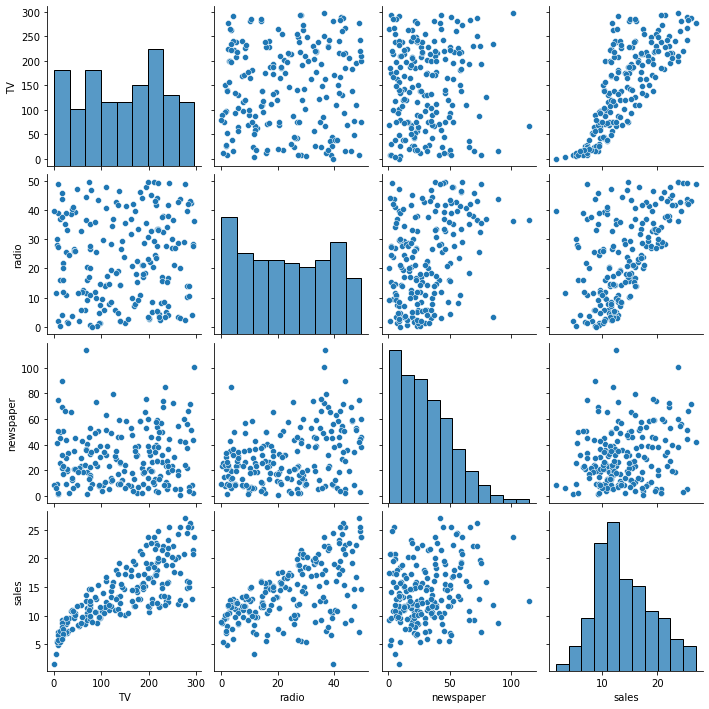

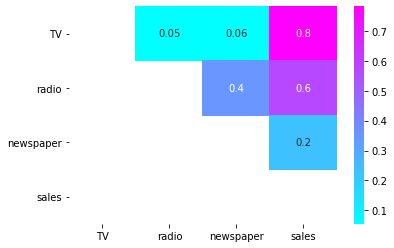

(140, 3) (140,) (60, 3) (60,)
2.880255286331323


,Coefficient
TV,0.043915
radio,0.200280
newspaper,0.001844


Mean Absolute Error: 1.2333759522850207
Mean Squared Error: 3.691394845698606
Root Mean Squared Error: 1.921300300759516
R Squared Score is: 0.8649018906637793
====OLS回歸================================================
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           8.76e-70
Time:                        11:39:57   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                  

In [20]:
#Your Guide to Linear Regression Models(https://www.kdnuggets.com/2020/10/guide-linear-regression-models.html)
#Linear Regression in Python(https://medium.com/@harishreddyp98/linear-regression-in-python-c164149b93ab)

import pandas as pd
import numpy as np
import seaborn as sns       # 關聯圖 seaborn depend on matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score  # 評分用
import statsmodels.api as sm   # #回歸模型套件

df = pd.read_csv(r"Datasets\Advertising.csv")
display(df.head())

df = df.drop(['Unnamed: 0'], axis=1)
print("====df.info()================================================")
print(df.info())  # df.info() Check data 是否沒有資料
print("====df.sales.describe()================================================")
print(df.sales.describe()) # df.sales 欄位的摘要
sns.pairplot(df)  # 檢視兩兩特徵之間的關聯圖(看Feature vs sales)
plt.show()

# data.corr()表示了data中的两个变量之间的相关性，取值范围为[-1,1],
# 取值接近-1，表示反相关，类似反比例函数，取值接近1，表正相关
mask = np.tril(df.corr())  # 取下三角矩陣 
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)
plt.show()

X = df.drop(['sales'], axis=1)
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

model = LinearRegression()
model.fit(X_train, Y_train)
# 模型的斜率及截距，分別儲存在model.coef_[0] 和 model.intercept_中。
print(model.intercept_) #截距 : 誤差值
# model.coef_ 相關聯繫數
coeff_df = pd.DataFrame(model.coef_, X.columns, columns =['Coefficient'])
display(coeff_df)

# #驗証模型
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  # 低比較好
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
# higher R² indicates a better fit for the model
print('R Squared Score is:', r2_score(Y_test, y_pred))  

# #interpret and improve 
print("====OLS回歸================================================")
X2 = sm.add_constant(X_train)      #增加模型的常數，使更為符合回歸模型
model_stats = sm.OLS(Y_train.values.reshape(-1,1), X2).fit()  #OLS回歸
print(model_stats.summary())

# #計算 50 for TV, 30 for radio and 10的收益
# sales =2.880+0.044 TV+0.200 radio + 0.002 newspaper
example = [50, 30, 10]  
output = model.intercept_ + sum(example*model.coef_)
print(f"Estimate Sales:{output}")

example = [30, 50, 10]  
output = model.intercept_ + sum(example*model.coef_)
print(f"Estimate Sales:{output}")

example = [20, 50, 20]  
output = model.intercept_ + sum(example*model.coef_)
print(f"Estimate Sales:{output}")